<a href="https://colab.research.google.com/github/WaqarAhmed571/data_science_project/blob/main/DataCleaning%20%26%20DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Random Data Generate
np.random.seed(42)
n = 100  # Total rows
data = {
    'age': np.random.randint(18, 65, size=n),  # Random ages between 18 and 65
    'salary': np.random.randint(30000, 150000, size=n),  # Random salary between 30k and 150k
    'department': np.random.choice(['HR', 'Engineering', 'Sales', 'Marketing'], size=n),  # Random department
    'experience': np.random.randint(1, 40, size=n)  # Random experience between 1 and 40 years
}

# Create DataFrame
df = pd.DataFrame(data)

# Random NaN values insert k
# Convert the columns to float type to handle NaN
df['salary'] = df['salary'].astype(float)
df['age'] = df['age'].astype(float)

df['salary'][::10] = np.nan  # Har 10th row mein NaN value daal rahe hain salary column mein
df['age'][::15] = np.nan  # Har 15th row mein NaN value daal rahe hain age column mein

# ... (rest of your code remains the same)

# DataFrame
df = pd.DataFrame(data)
df.head()

<ipython-input-13-6c672b9aafb8>:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['salary'][::10] = np.nan  # Har 10th row mein NaN value daal rahe hain salary column mein
<ipython-input-13-6c672b9aafb8>:23: SettingWithCopyWarning: 
A val

,age,salary,department,experience
0,56,32695,Sales,39
1,46,78190,Sales,18
2,32,35258,Engineering,1
3,60,117538,Marketing,11
4,25,69504,Sales,28


In [6]:
# 2. Data Cleaning
# Handle Null Values
print("Before Cleaning:")
print(df.isnull().sum())  # Null values count

Before Cleaning:
age           0
salary        0
department    0
experience    0
dtype: int64


In [14]:
df['salary'].fillna(df['salary'].mean(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

<ipython-input-14-7d337d8eb915>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(df['salary'].mean(), inplace=True)
<ipython-input-14-7d337d8eb915>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [15]:
# Remove Duplicates (if available)
df.drop_duplicates(inplace=True)

# Handle outliers
df = df[(df['salary'] < 150000) & (df['salary'] > 30000)]  # salary ka range set kar rahe hain

print("\nAfter Cleaning:")
print(df.isnull().sum())  # Null values ka count after cleaning


After Cleaning:
age           0
salary        0
department    0
experience    0
dtype: int64


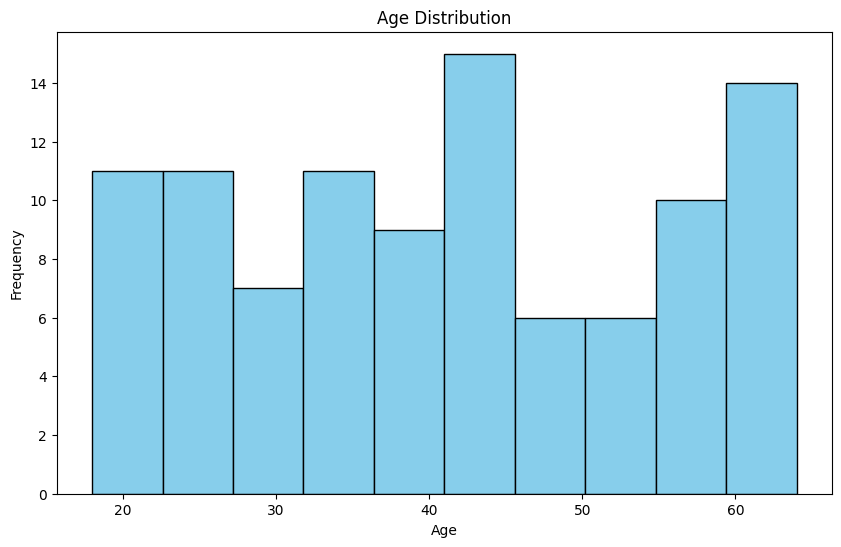

In [9]:
# 3. Data Visualization

# a) Age Distribution Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

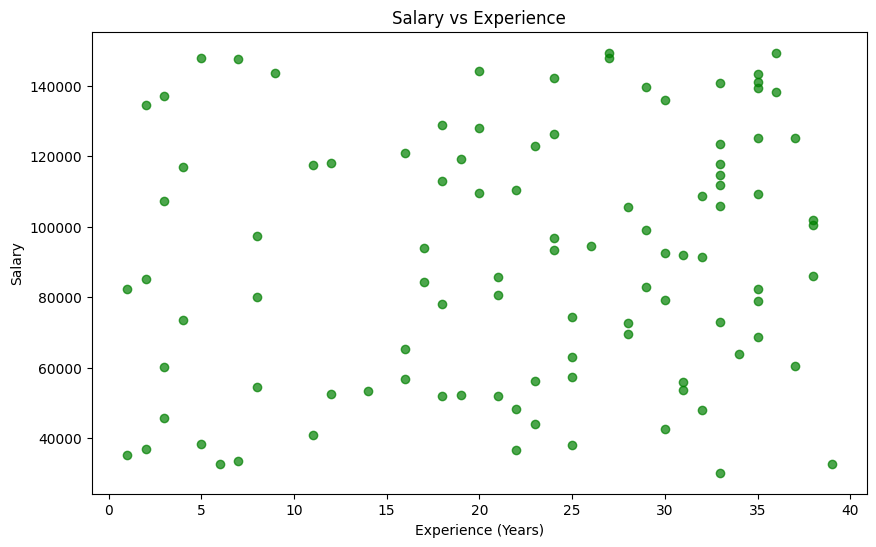

In [10]:
# b) Salary vs Experience Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['experience'], df['salary'], color='green', alpha=0.7)
plt.title('Salary vs Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()

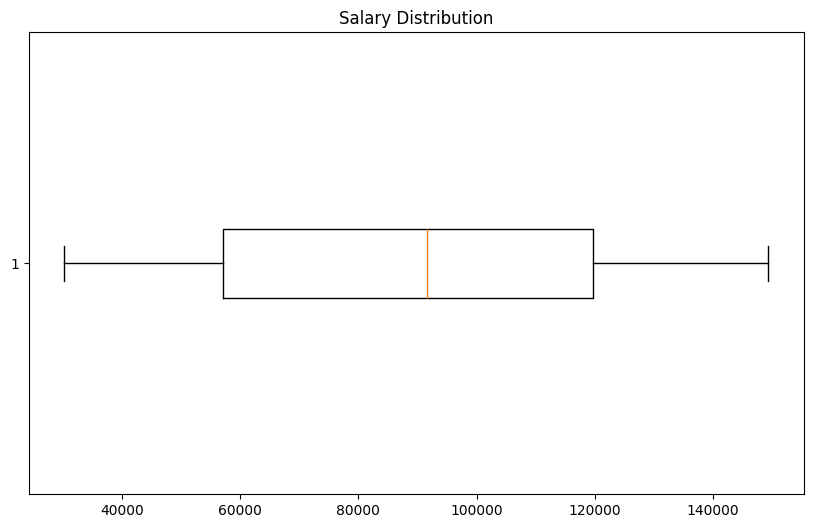

In [11]:
# c) Box Plot for Salary
plt.figure(figsize=(10, 6))
plt.boxplot(df['salary'], vert=False)
plt.title('Salary Distribution')
plt.show()



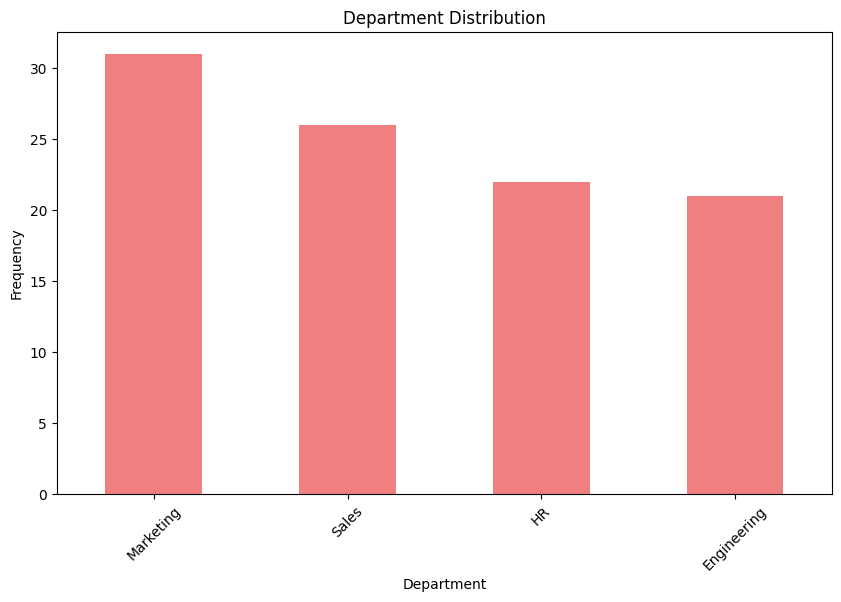

In [12]:
# d) Department Distribution Bar Plot
department_counts = df['department'].value_counts()
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='lightcoral')
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
